In [3]:
from matplotlib import pylab as plb
from PIL import Image
import cv2
import numpy as np
import tensorflow as tf

In [229]:
def show_img(img):
    plb.figure(figsize=(18,18))
    plb.imshow(img)
    plb.show()

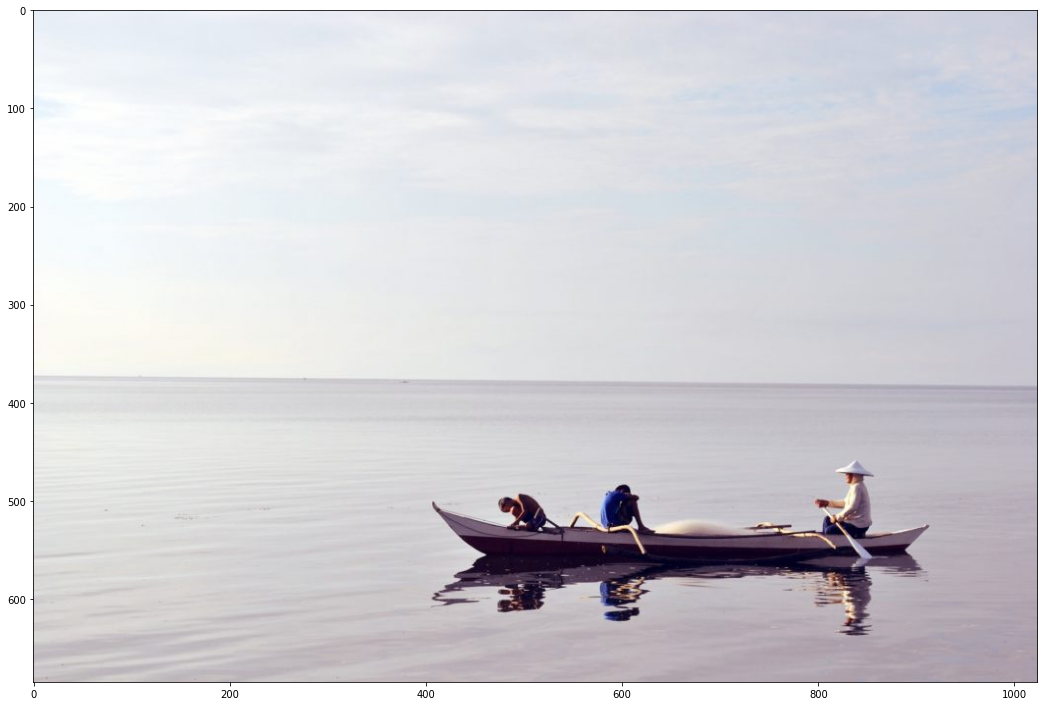

In [230]:
img = plb.array(Image.open("../boat_initial-1024x685.jpg"))
show_img(img)

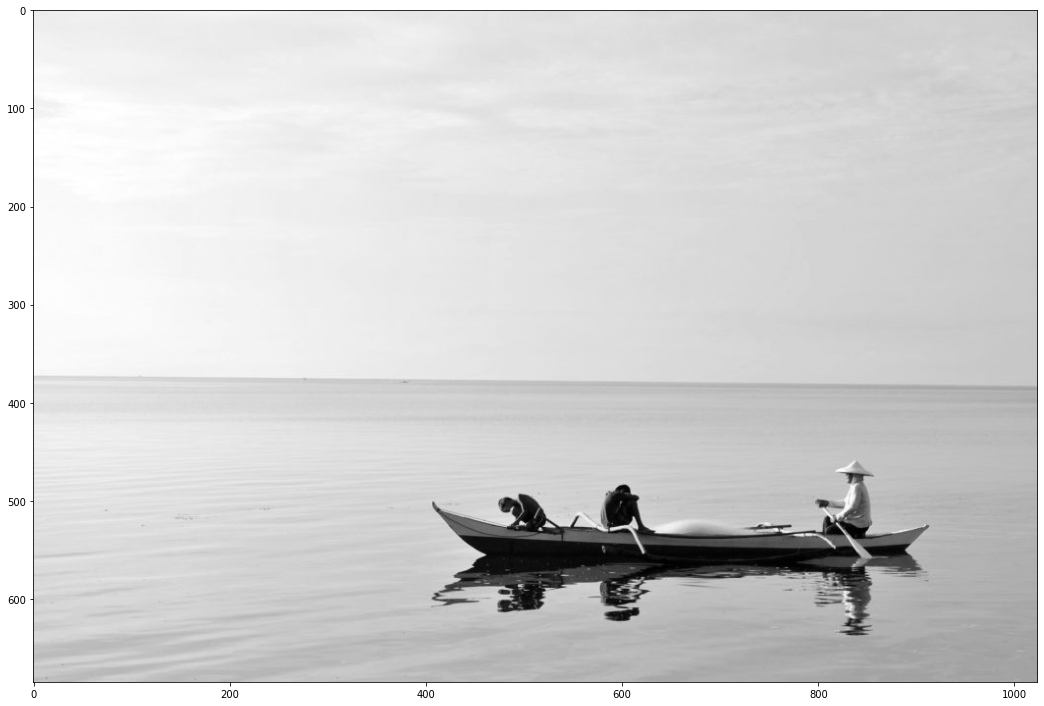

In [231]:
img = plb.array(Image.open("../boat_initial-1024x685.jpg").convert("L"))
show_img(img)

(0.5, 1023.5, 0.5, 684.5)

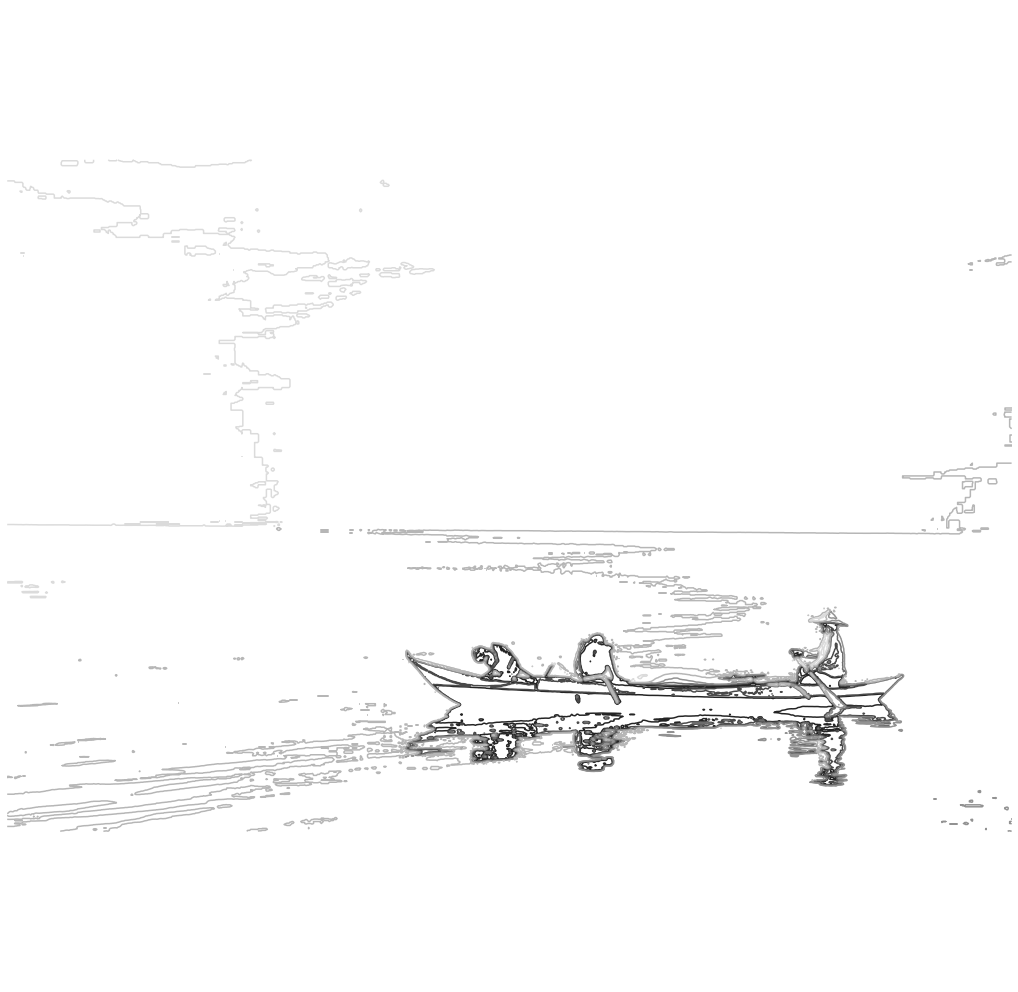

In [5]:
plb.figure(figsize=(18,18))
plb.gray()

plb.contour(img, origin="image")
plb.axis("equal")
plb.axis("off")

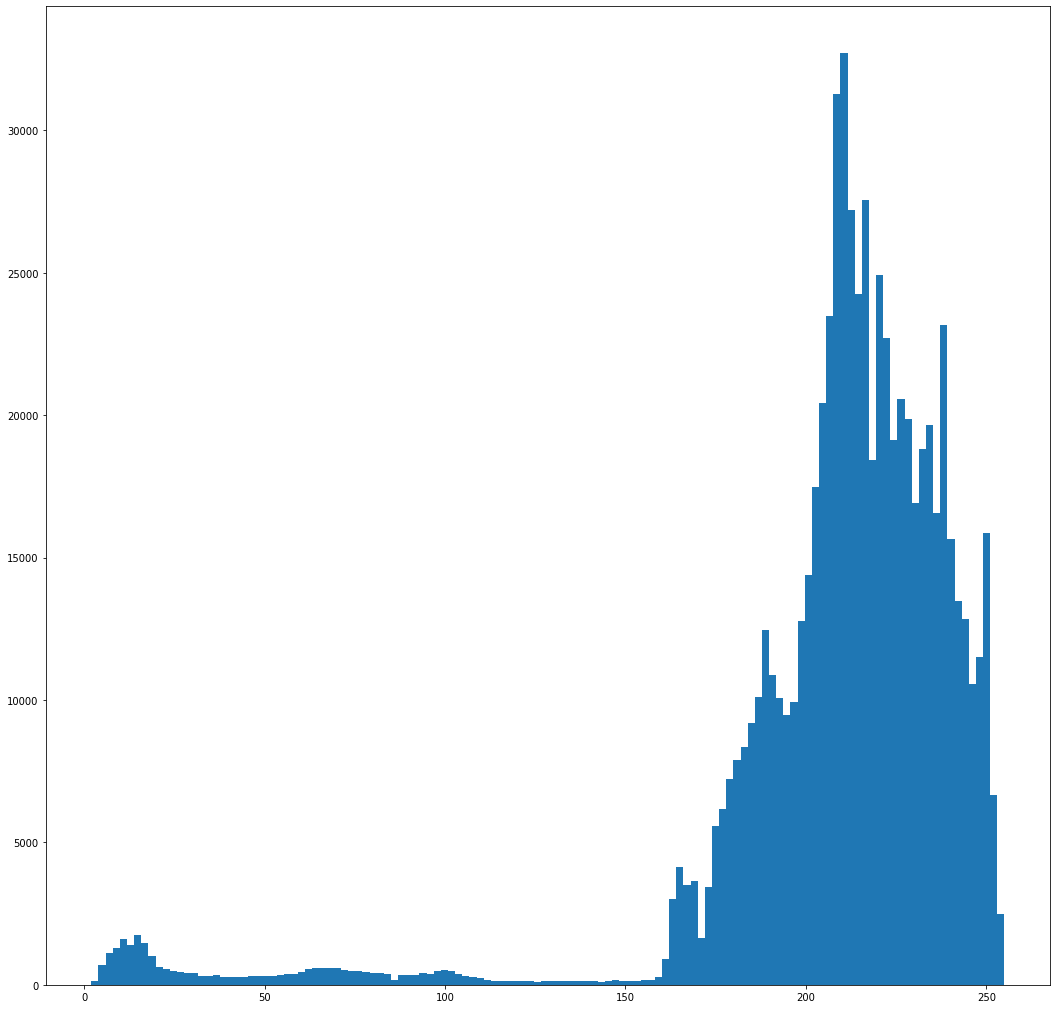

In [6]:
plb.figure(figsize=(18,18))
plb.hist(img.flatten(), 128)
plb.show()

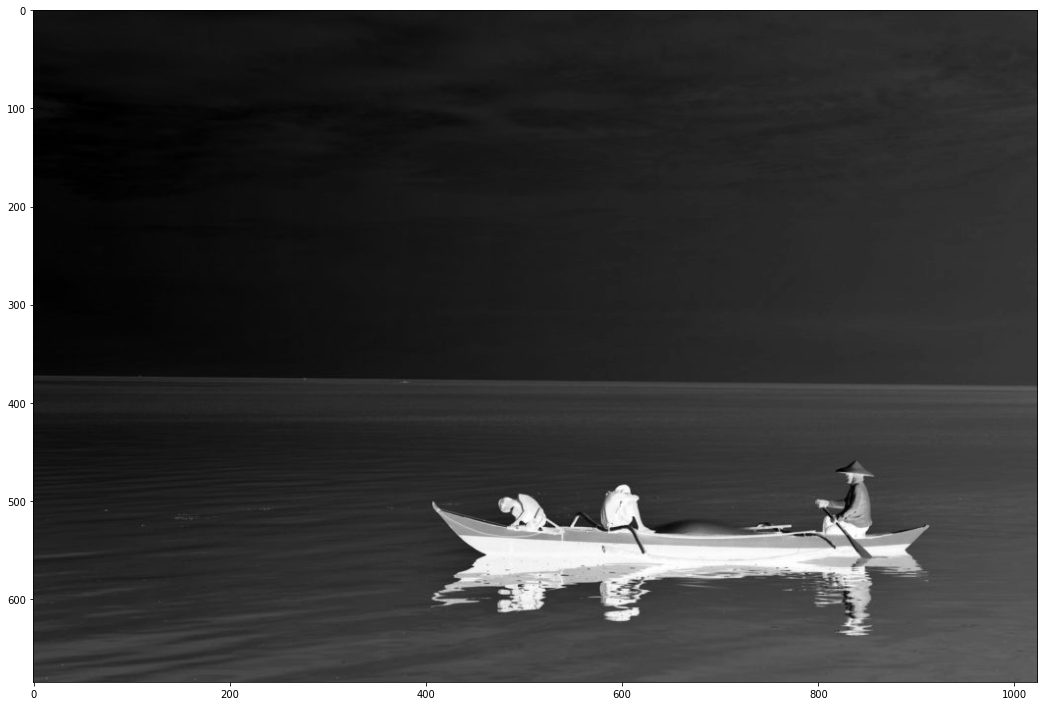

In [7]:
plb.figure(figsize=(18,18))

plb.imshow(255-img)

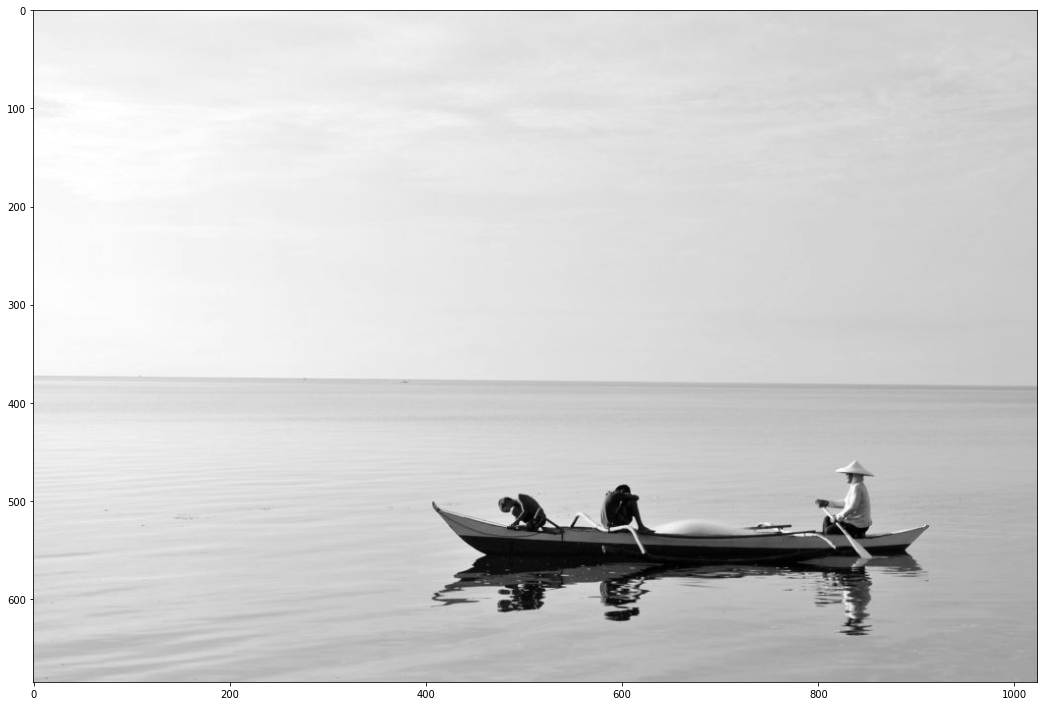

In [8]:
plb.figure(figsize=(18,18))

plb.imshow((100.0/255.0)*img+100.0)

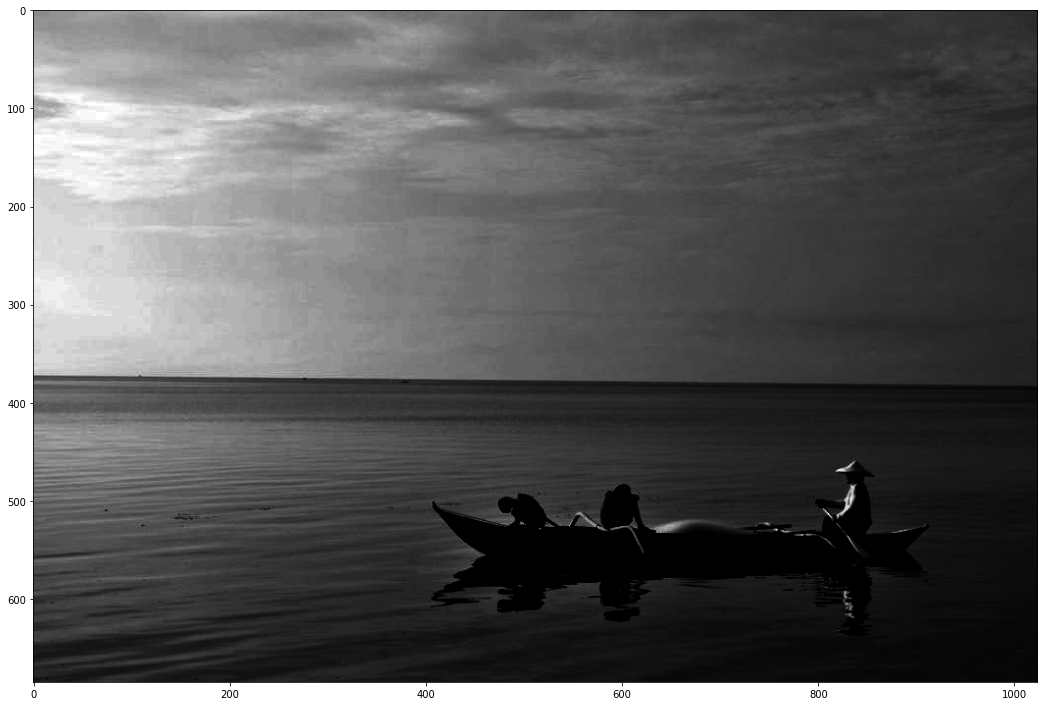

In [9]:
plb.figure(figsize=(18,18))

plb.imshow(255.0*(img/255.0)**8)

In [10]:
def cdf_calc(img, nbr_bins=256):
    
    img_hist, bins = plb.histogram(img.flatten(), nbr_bins, normed=True)
    
    cdf = img_hist.cumsum()
    cdf = 255 * cdf/cdf[-1]
    
    output_img = plb.interp(img.flatten(), bins[:-1], cdf)
    return output_img.reshape(img.shape), cdf

In [11]:
cdf_img, cdf = cdf_calc(img)

/Users/sergej/PycharmProjects/openCV_introduce/venv/lib/python3.7/site-packages/ipykernel_launcher.py:3: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
  This is separate from the ipykernel package so we can avoid doing imports until


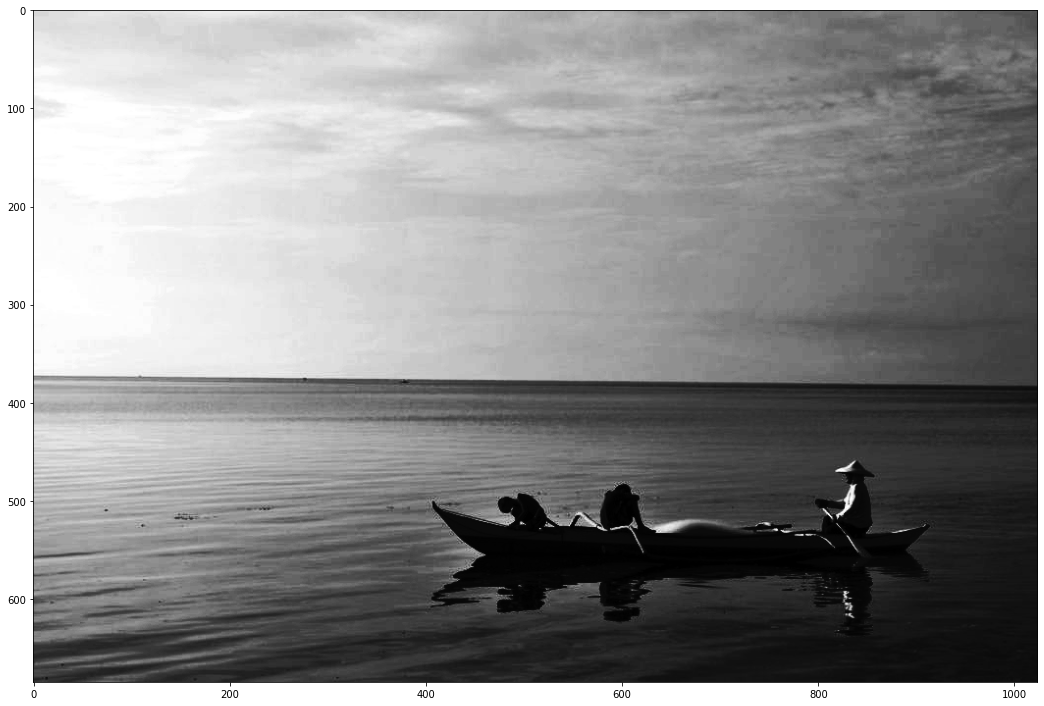

In [232]:

show_img(cdf_img)

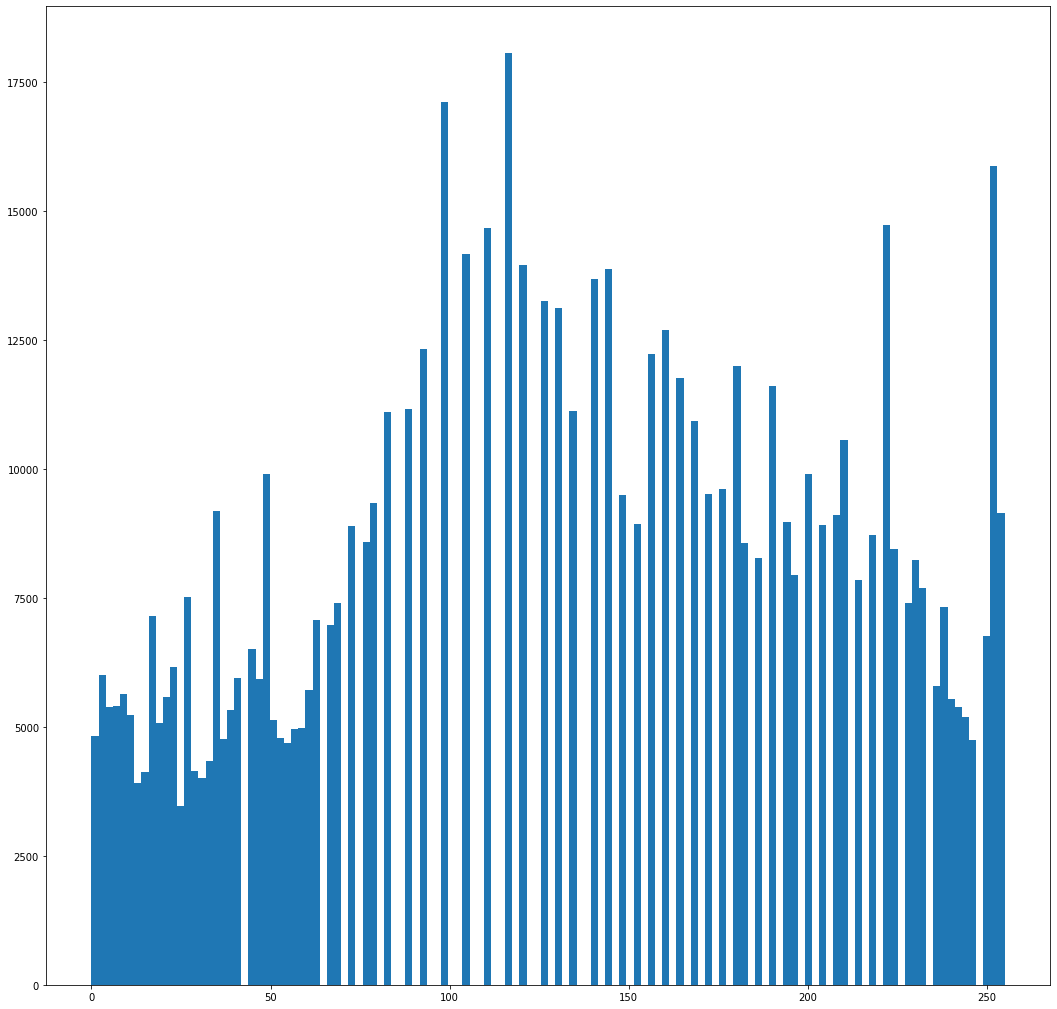

In [13]:
plb.figure(figsize=(18,18))
plb.hist(cdf_img.flatten(), 128)
plb.show()

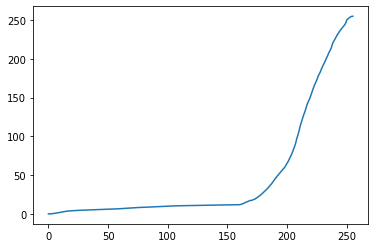

In [14]:
plb.plot(cdf)

In [15]:
def pca(X):
    num_data, dim = X.shape
    
    mean_X = X.mean(axis=0)
    X = X-mean_X
    
    if dim>num_data:
        M = np.dot(X,X.T)
        e, EV = np.linalg.eigh(M)
        
        tmp = np.dot(X.T, EV).T
        
        V = tmp[::-1]
        S = np.sqrt(e)[::-1]
        
        for i in range(V.shape[1]):
            V[:,i] /= S
    else:
        U,S,V = np.linalg.svd(X)
        V = V[:num_data]
        
    return V,S,mean_X

In [16]:
V,S,mean_X = pca(img)

In [17]:
mean_X.shape

(1024,)

In [18]:
img.shape

(685, 1024)

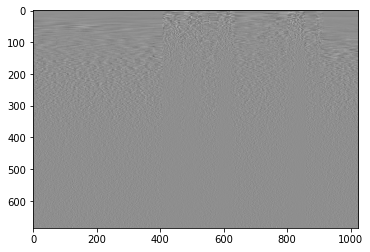

In [19]:
plb.imshow(V)

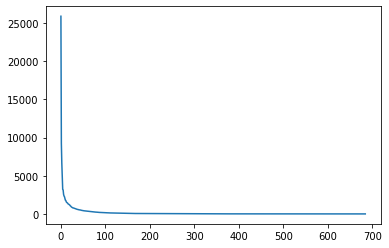

In [20]:
plb.plot(S)

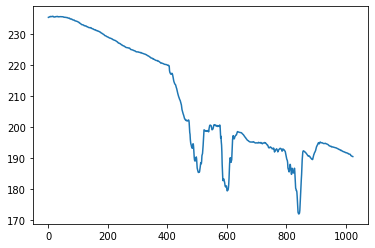

In [21]:
plb.plot(mean_X)

In [22]:
img.shape

(685, 1024)

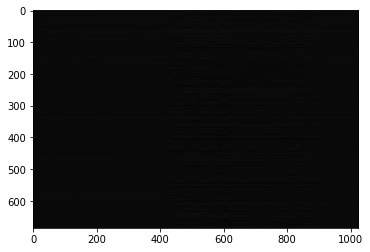

In [23]:
plb.imshow(np.dot(img.T, np.linalg.eigh(np.dot(img,img.T))[1]).T[::-1])

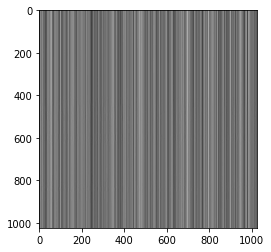

In [24]:
plb.imshow(np.dot(img.T, V))

In [25]:
(train_x, train_y), (test_x, test_y) = tf.keras.datasets.fashion_mnist.load_data()

In [26]:
train_x.shape

(60000, 28, 28)

In [27]:
train_y.shape

(60000,)

In [28]:
same_items = []

for i in range(0, len(train_y)):
    if train_y[i] == 3:
        same_items.append(train_x[i])
        
same_items = np.array(same_items)

In [29]:
same_items.shape

(6000, 28, 28)

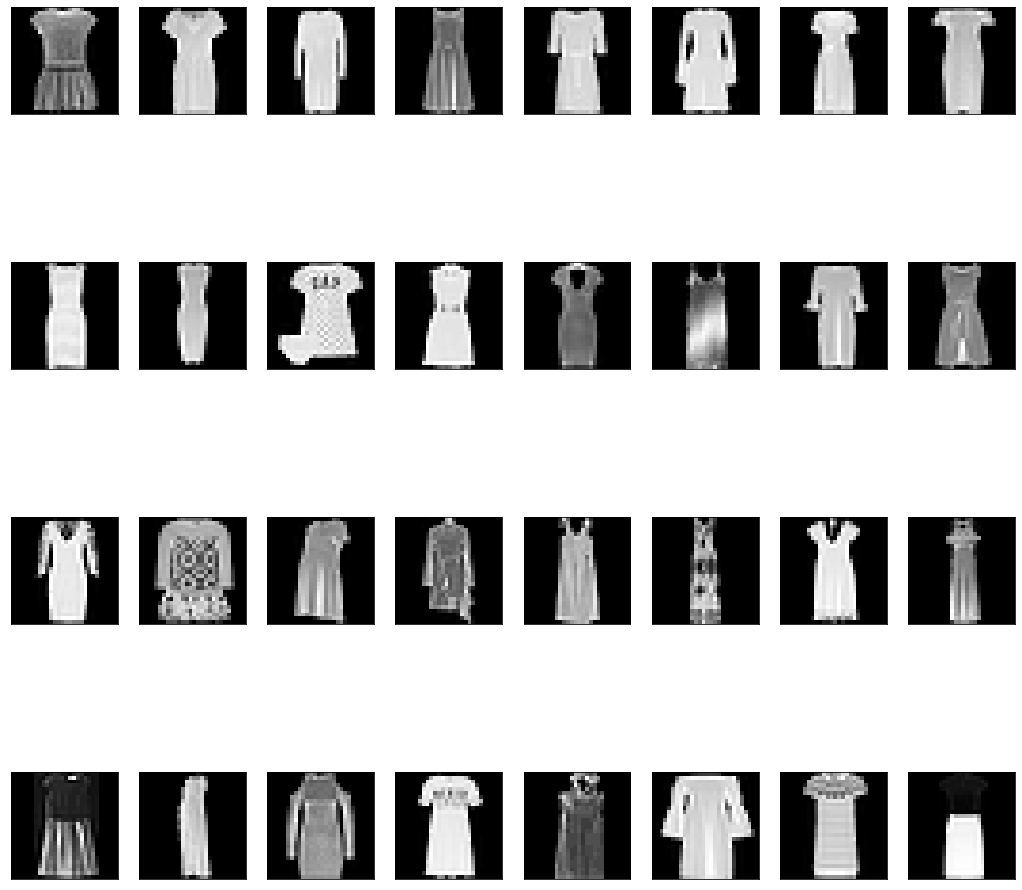

In [30]:

fig = plb.figure(figsize=(18, 18))
for j in range(same_items[:32].shape[0]):
    ax = fig.add_subplot(4, 8, j+1)
    ax.imshow(same_items[j,:,:], cmap='gray')
    plb.xticks([]), plb.yticks([])
plb.show()

In [31]:
imnbr,m,n = same_items.shape

In [32]:
imnbr,m,n

(6000, 28, 28)

In [33]:
new_items = []
for i in same_items:
    new_items.append(i.flatten())
    
new_items = np.array(new_items)

In [34]:
new_items.shape

(6000, 784)

In [35]:
new_items[0].shape

(784,)

In [36]:
V,S,immean = pca(new_items)

In [37]:
V.shape

(784, 784)

In [38]:
S.shape

(784,)

In [39]:
immean.shape

(784,)

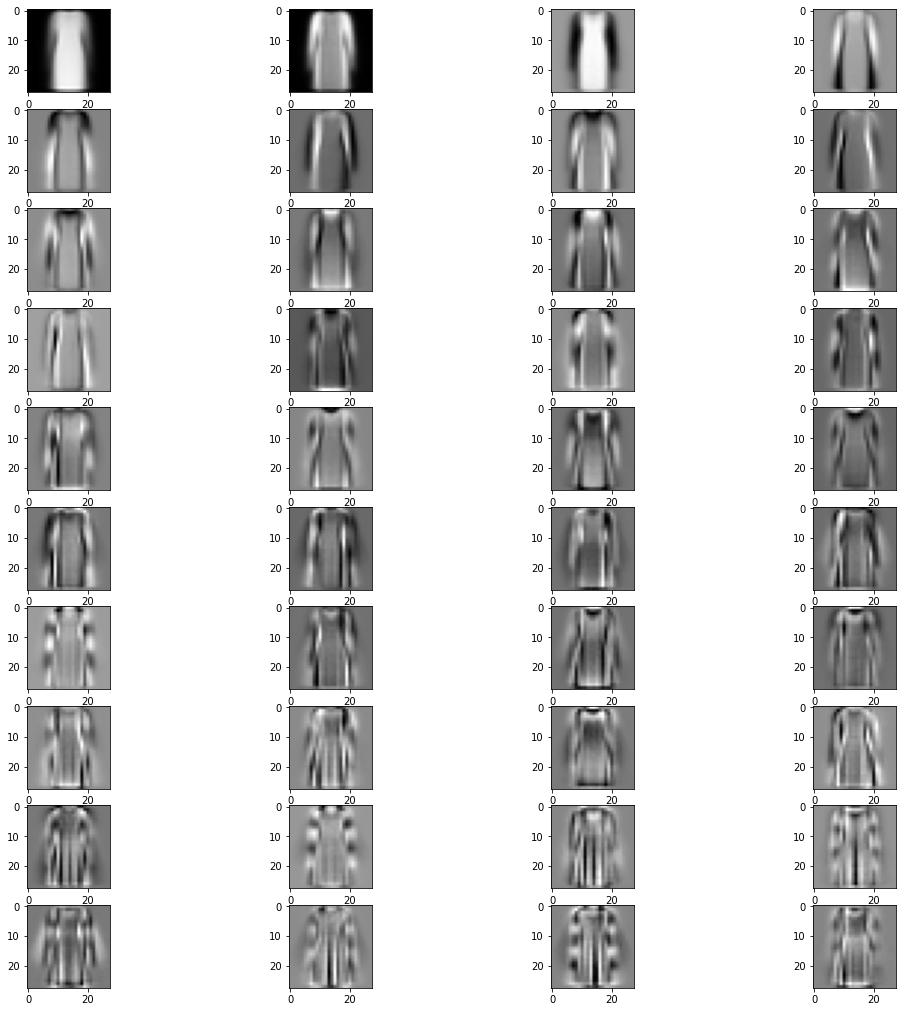

In [40]:
plb.figure(figsize=(18,18))
plb.gray()
plb.subplot(10,4,1)
plb.imshow(immean.reshape(m,n))

for i in range(39):
    plb.subplot(10,4,i+2)
    plb.imshow(V[i].reshape(m,n))
    
plb.show()

In [41]:
import pickle

In [42]:
with open("fashion_mnist_pca_mods.pkl", "wb") as f:
    pickle.dump(immean, f)
    pickle.dump(V,f)
    pickle.dump(S,f)

In [43]:
with open("fashion_mnist_pca_mods.pkl", "rb") as f:
    immean = pickle.load(f)

In [44]:
immean.shape

(784,)

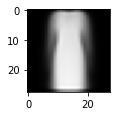

In [45]:
plb.figure(figsize=(18,18))
plb.gray()
plb.subplot(10,4,1)
plb.imshow(immean.reshape(m,n))

In [46]:
from scipy.ndimage import filters

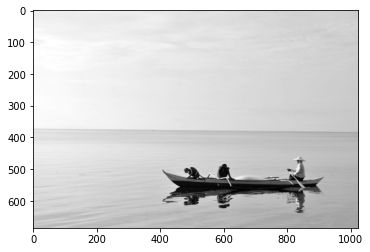

In [47]:
plb.imshow(img)

In [89]:
def get_gaussian_img(img, coef):
     return filters.gaussian_filter(img, coef)

In [90]:
def show_gaussian_diffs(img):
    g_img_list = []
    for coef in [0,5,12,42,98,356]:
        g_img_list.append(get_gaussian_img(img, coef))
        
    plb.figure(figsize=(18,18))
    for i in range(len(g_img_list)):
        plb.subplot(4,2,i+1)
        plb.imshow(g_img_list[i])
    
    plb.figure(figsize=(18,18))
    plb.imshow(g_img_list[-1])
    plb.show()

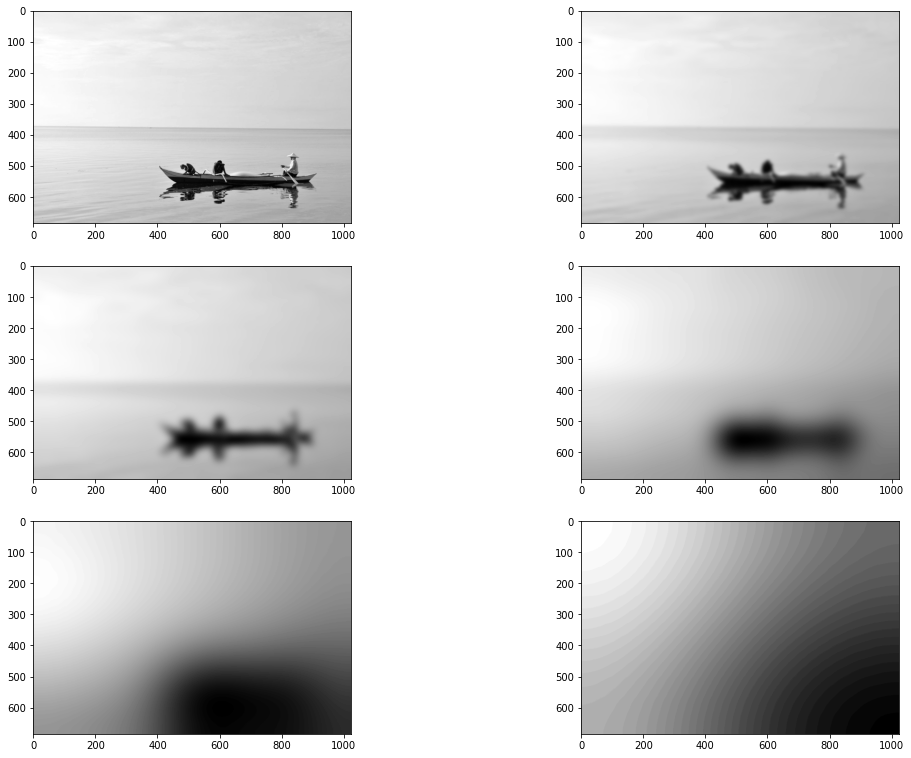

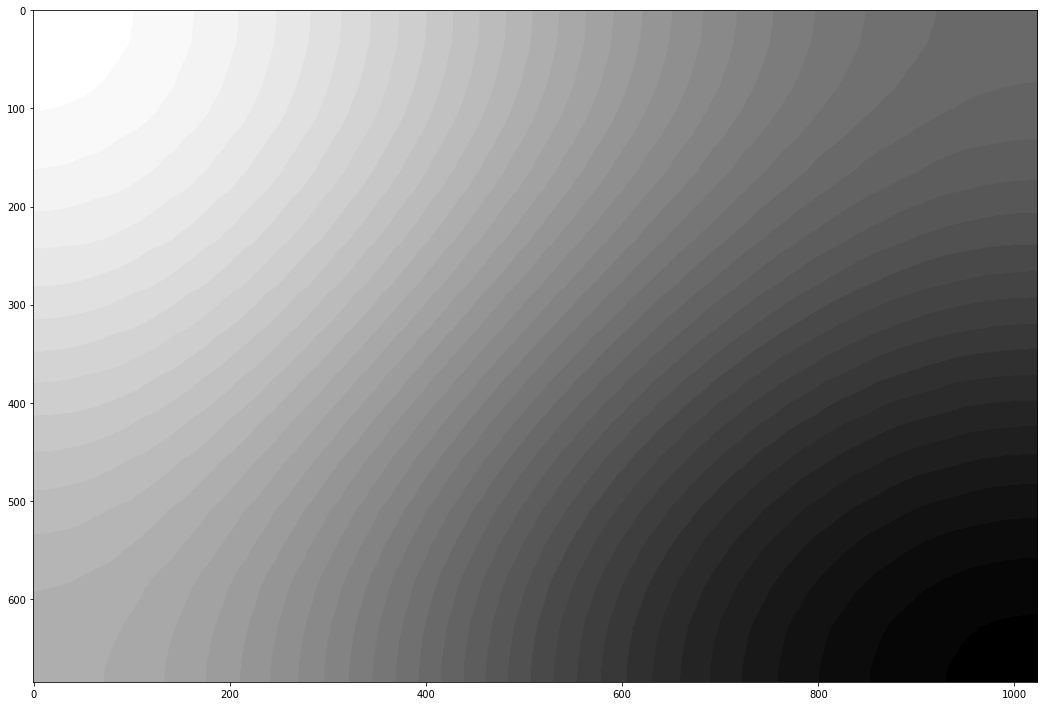

In [91]:
show_gaussian_diffs(img)

In [106]:
img = plb.array(Image.open("../sac.png").convert("L"))

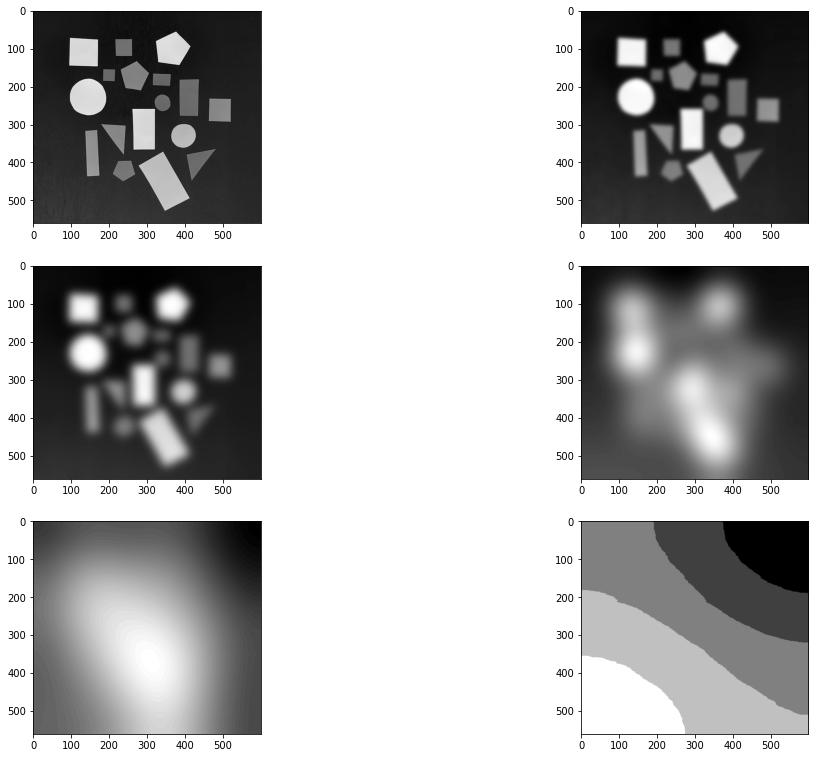

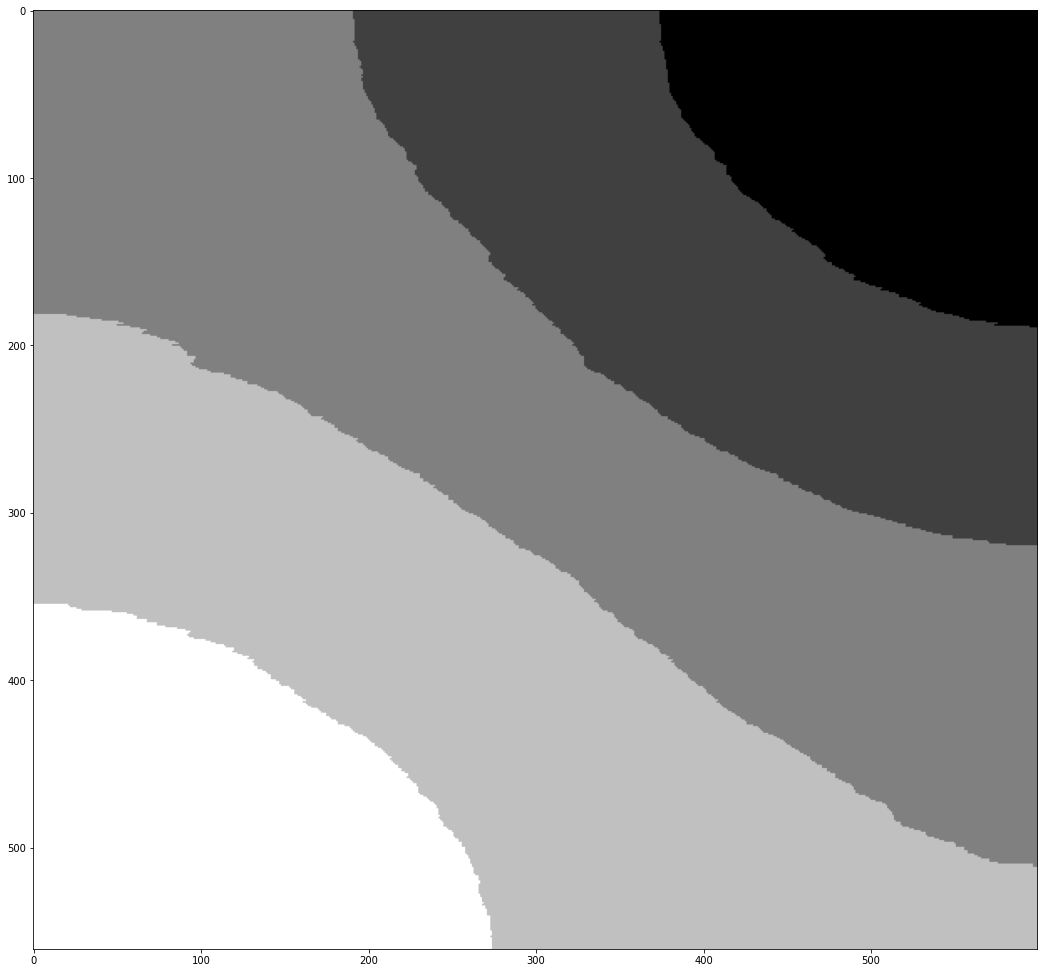

In [107]:
show_gaussian_diffs(img)

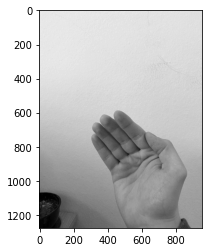

In [169]:
img = np.array(Image.open("../second_test.jpg").convert("L"))
plb.imshow(img)
plb.show()

In [170]:
def get_intensity_derivation(img):

    X = np.zeros(img.shape)
    sobel_X = filters.sobel(img,1,X)
    
    Y = np.zeros(img.shape)
    sobel_Y = filters.sobel(img,0,Y)
    
    magnitude = np.sqrt(X**2 + Y**2)
    
    return sobel_X, sobel_Y, magnitude

In [171]:
sobel_X,sobel_Y,magnitude = get_intensity_derivation(img)

In [172]:
intensity_derivation = [sobel_X, sobel_Y, magnitude]

def show_intensity_derivation(intensity_derivation):

    for i in range(len(intensity_derivation)):
        plb.figure(figsize=(18,18))
        plb.imshow(intensity_derivation[i])
        plb.show()

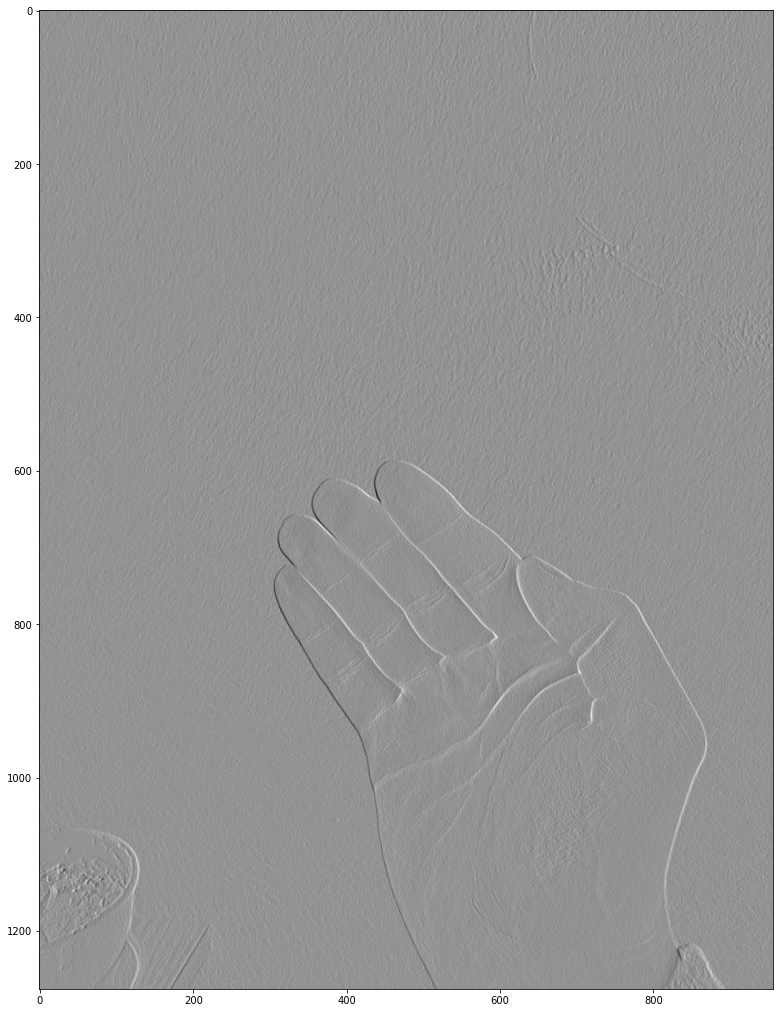

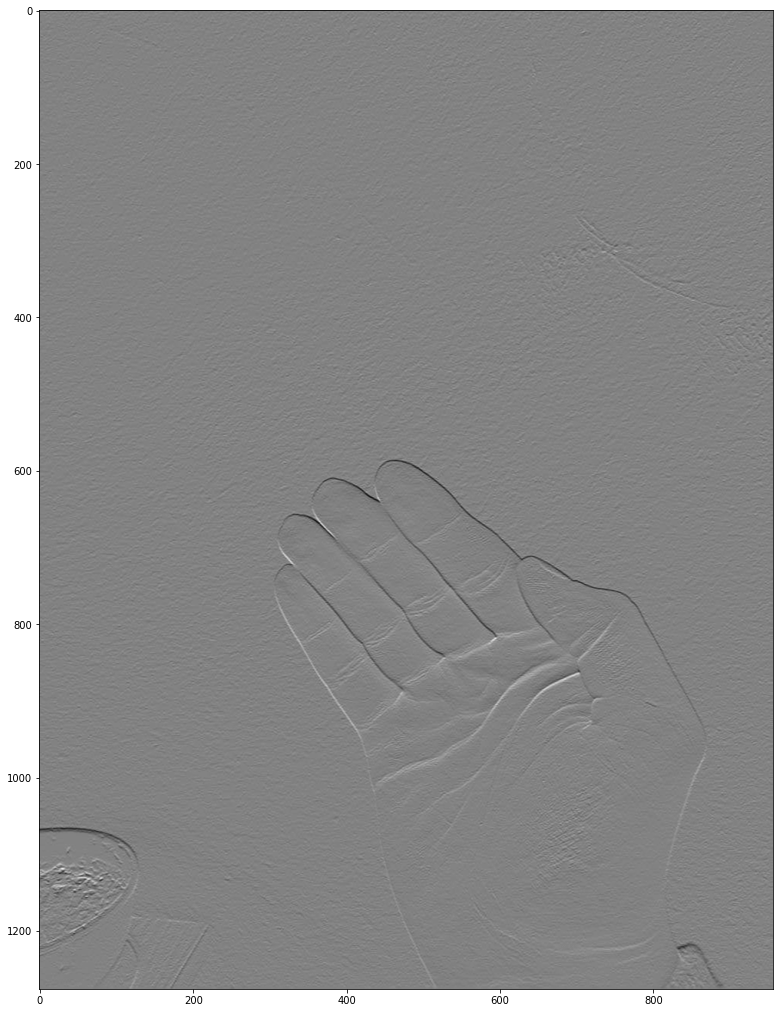

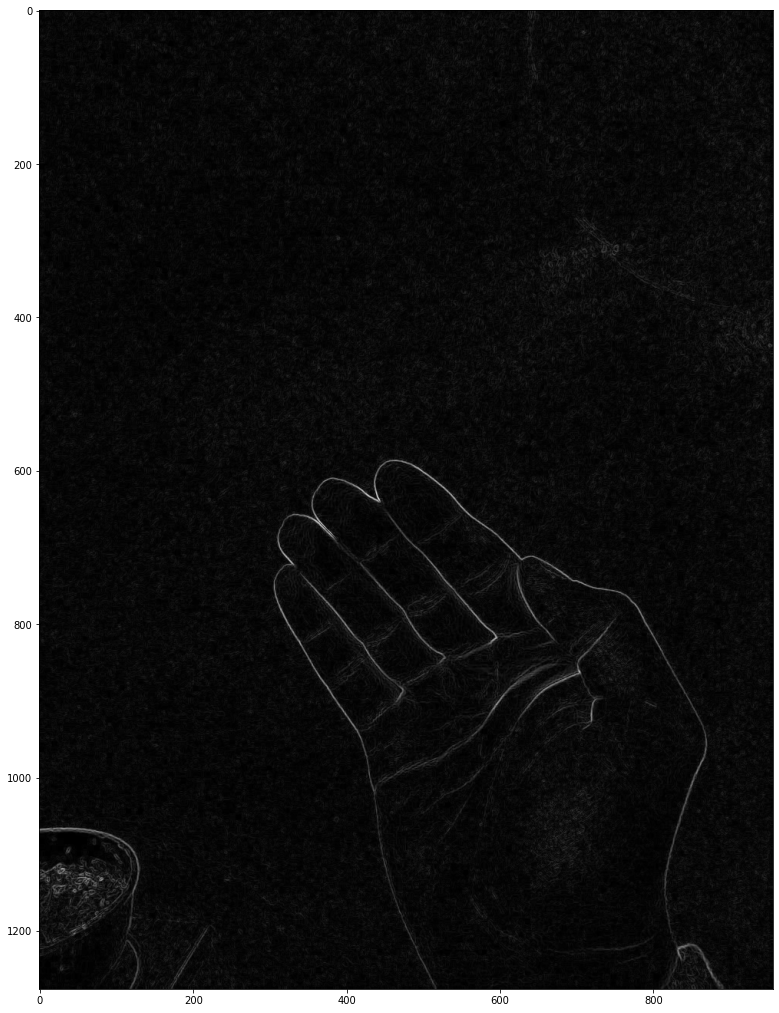

In [173]:
show_intensity_derivation(intensity_derivation)

In [174]:
def get_intensity_derivation(img):

    X = np.zeros(img.shape)
    sobel_X = filters.prewitt(img,1,X)
    
    Y = np.zeros(img.shape)
    sobel_Y = filters.prewitt(img,0,Y)
    
    magnitude = np.sqrt(sobel_X**2 + sobel_Y**2)
    
    return sobel_X, sobel_Y, magnitude

In [175]:
sobel_X, sobel_Y, magnitude = get_intensity_derivation(img)

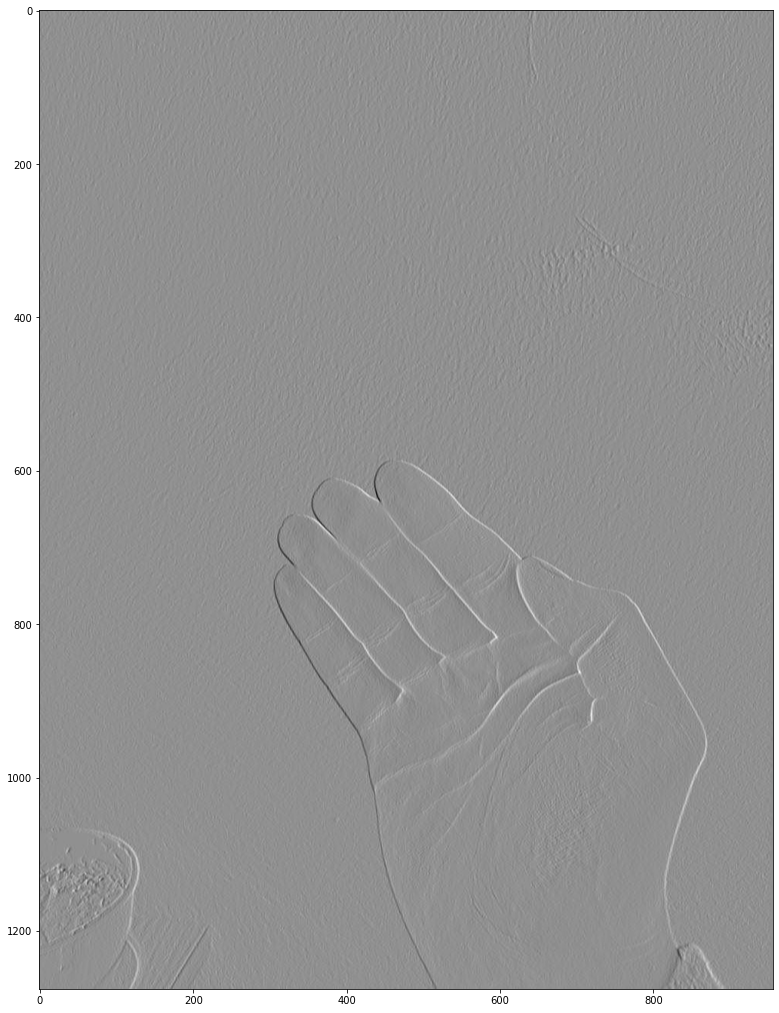

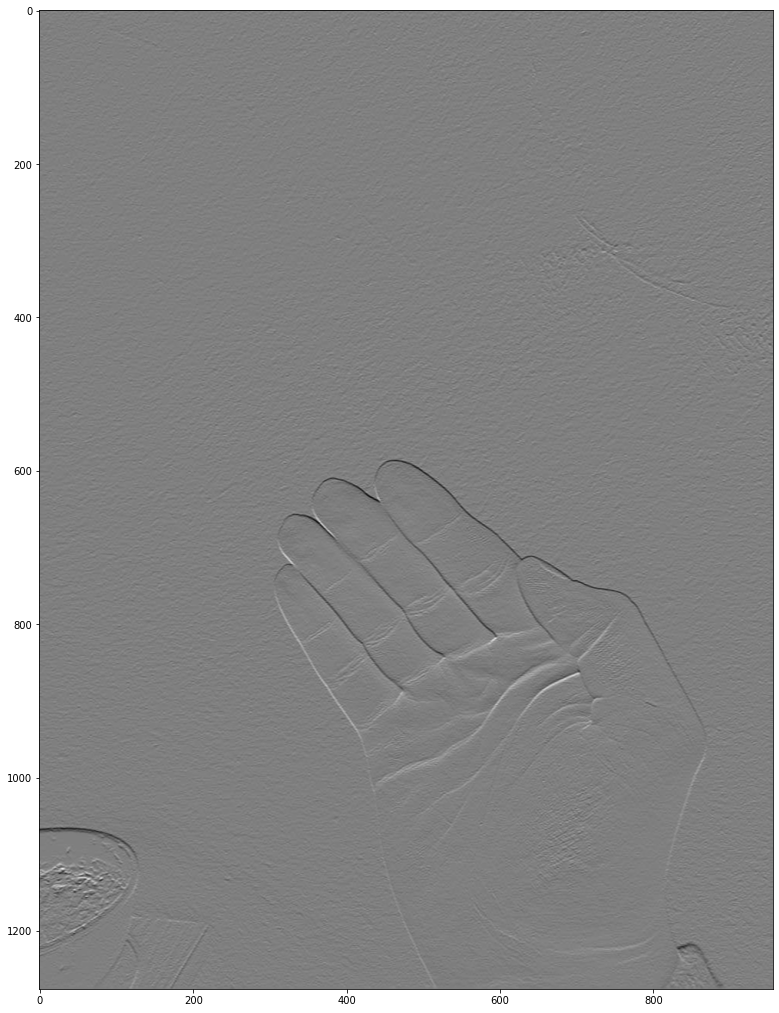

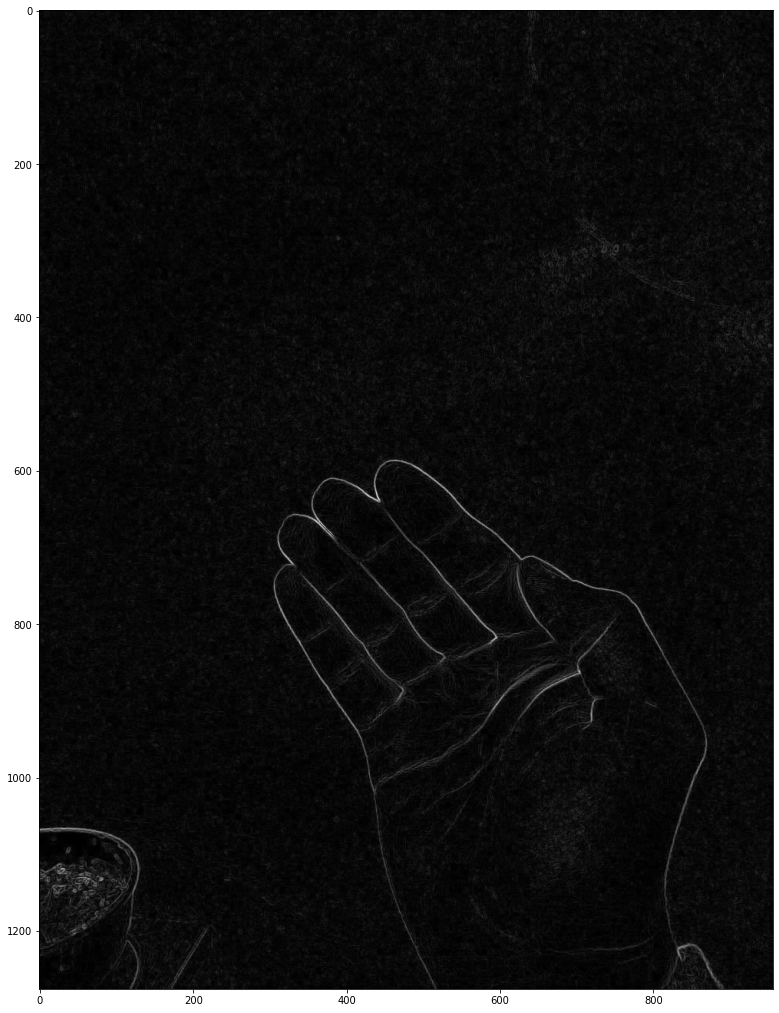

In [176]:
intensity_derivation = [sobel_X, sobel_Y, magnitude]

show_intensity_derivation(intensity_derivation)

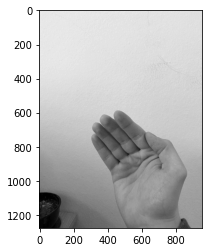

In [177]:
img = np.array(Image.open("../second_test.jpg").convert("L"))
plb.imshow(img)
plb.show()

In [180]:
sigma = 5

X = np.zeros(img.shape)
filters.gaussian_filter(img, (sigma,sigma), (0,1), X)

Y = np.zeros(img.shape)
filters.gaussian_filter(img, (sigma, sigma), (0,1), Y)

magnitude = np.sqrt(X**2 + Y**2)

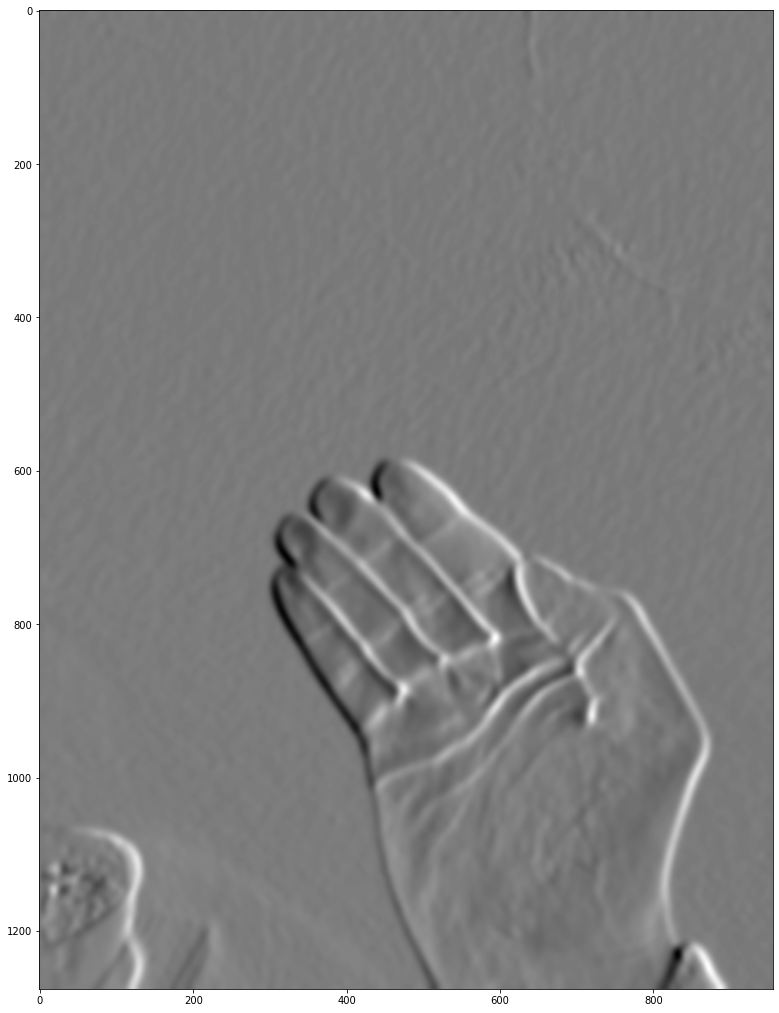

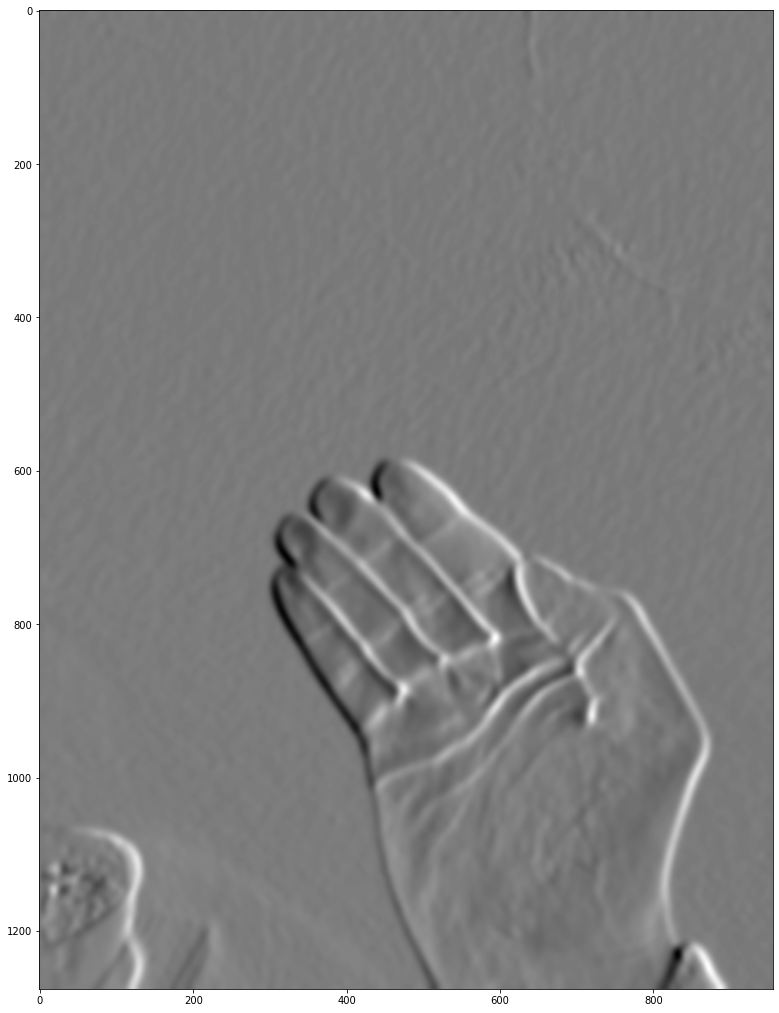

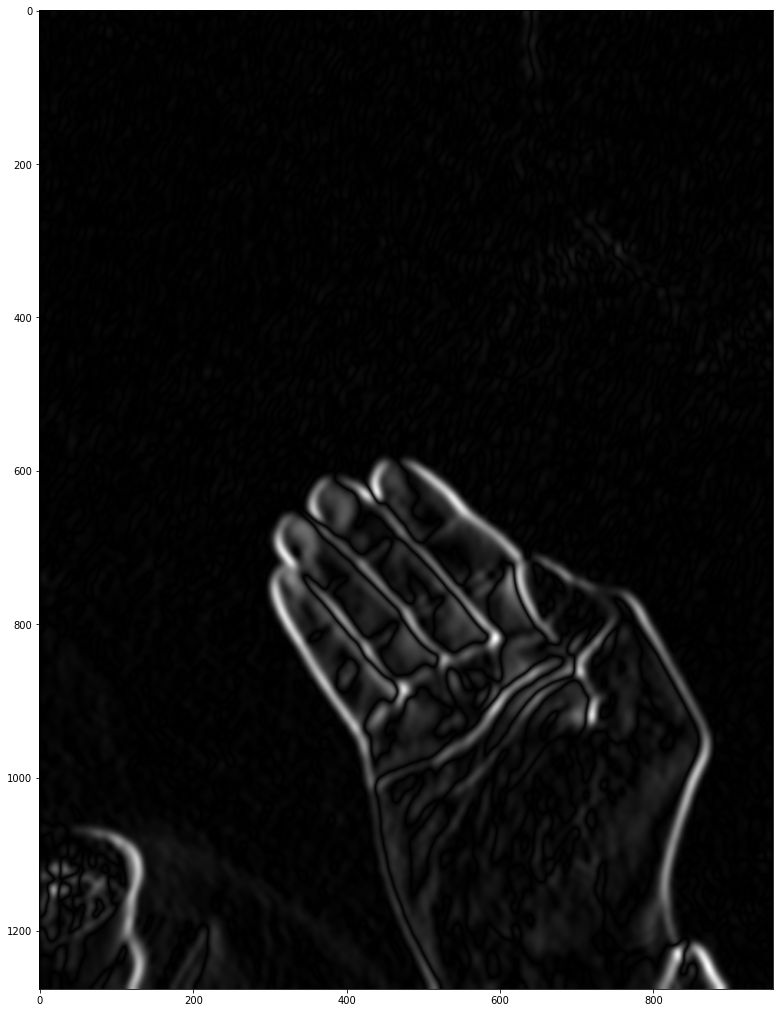

In [181]:
intensity_derivation = [X, Y, magnitude]

show_intensity_derivation(intensity_derivation)